<a href="https://colab.research.google.com/github/ihabiba/NLP-Labs/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Spam Email Classification (SMS Spam Dataset)

### Step 1-1: Load and Explore the Dataset

In [22]:
# Step 1: Load Dataset
# Assuming the file is saved as `spam.csv` in the current working directory

import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.iloc[:, :2]  # Keep only the first two columns (label and message)
df.columns = ["label", "message"]

print("Dataset Sample:")
print(df.head())
print("\nLabel distribution:")
print(df['label'].value_counts())

Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


### Step 1-2: Text Preprocessing (Cleaning, Tokenization, Stopword Removal, Label Encoding)

In [23]:
# Step 2: Preprocess Data

import re
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords

def preprocess_text(text):
    # Remove special characters (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join back to string
    return ' '.join(filtered_tokens)

# Apply preprocessing to each message
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Convert labels to binary (1 for spam, 0 for ham)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

print("Sample after cleaning:")
print(df[['label', 'message', 'cleaned_message']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample after cleaning:
   label                                            message  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


### Step 1-3: Split Data into Training and Testing Sets

In [24]:
# Step 3: Split Data

from sklearn.model_selection import train_test_split

X = df['cleaned_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 3900
Testing samples: 1672


### Step 1-4: Feature Engineering with Bag-of-Words (CountVectorizer)

In [25]:
# Step 4: Feature Engineering with BoW

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_features=10000,
    ngram_range=(1, 1),
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of BoW Feature Matrix (Training):", X_train_vec.shape)
print("Shape of BoW Feature Matrix (Testing):", X_test_vec.shape)

Shape of BoW Feature Matrix (Training): (3900, 6697)
Shape of BoW Feature Matrix (Testing): (1672, 6697)


### Step 1-5a: Train Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

print("Naive Bayes model trained.")

Naive Bayes model trained.


### Step 1-5b: Train SVM Classifier

In [27]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_vec, y_train)

print("SVM model trained.")

SVM model trained.


### Step 1-5c: Train Logistic Regression Classifier

In [28]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_model.fit(X_train_vec, y_train)

print("Logistic Regression model trained.")

Logistic Regression model trained.


### Step 1-5d: Train Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

print("Random Forest model trained.")

Random Forest model trained.


### Step 1-6: Make Predictions (Using Logistic Regression as Example)

In [30]:
# Use the logistic regression model for prediction (example)
model = logreg_model

y_pred = model.predict(X_test_vec)

print("Predictions made on test set.")

Predictions made on test set.


### Step 1-7: Evaluate Model Performance

In [31]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.9754784688995215

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1453
        Spam       0.99      0.82      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### Step 1-8: Confusion Matrix

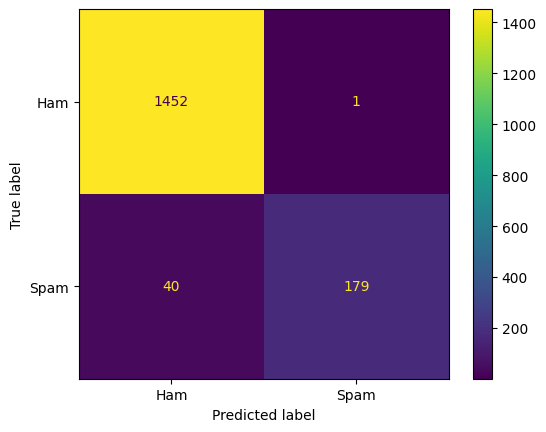

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')

# Part 2: News Article Classification (20 Newsgroups Dataset)

### Step 2-1: Load and Explore the Dataset

In [33]:
# Step 1: Load Dataset
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.sport.baseball', 'comp.sys.mac.hardware', 'sci.crypt', 'talk.politics.misc']

data = fetch_20newsgroups(
    subset='all',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

print("Number of documents:", len(data.data))
print("Category names:", data.target_names)
print("\nSample document:")
print(data.data[0][:500])  # print first 500 chars

Number of documents: 3723
Category names: ['comp.sys.mac.hardware', 'rec.sport.baseball', 'sci.crypt', 'talk.politics.misc']

Sample document:

I am hoping to produce the first update of the BB DDD this week;
please send info about the most significant (longest, most critical,
etc.) home run that you have seen yet this season.


### Step 2-2: Preprocess the Text

In [34]:
# Step 2: Clean and Preprocess Data
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text.lower())     # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(filtered_tokens)          # Join tokens into a single string

# Apply preprocessing
cleaned_data = []
cleaned_labels = []

for doc, labels in zip(data.data, data.target):
    if isinstance(doc, str) and doc.strip():
        cleaned_data.append(preprocess_text(doc))
        cleaned_labels.append(labels)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 2-3: Train/Test Split

In [35]:
# Step 3: Train/Test Split for NEWS
from sklearn.model_selection import train_test_split

X_news_train, X_news_test, y_news_train, y_news_test = train_test_split(
    cleaned_data,
    cleaned_labels,
    test_size=0.3,
    random_state=42
)

print("Training samples:", len(X_news_train))
print("Testing samples:", len(X_news_test))


Training samples: 2523
Testing samples: 1082


### Step 2-4: TF-IDF Vectorization

In [36]:
# Step 4: TF-IDF Vectorization for NEWS
from sklearn.feature_extraction.text import TfidfVectorizer

news_vectorizer = TfidfVectorizer(max_features=5000)

X_news_train_tfidf = news_vectorizer.fit_transform(X_news_train)
X_news_test_tfidf = news_vectorizer.transform(X_news_test)

print("Training TF-IDF matrix shape:", X_news_train_tfidf.shape)
print("Testing TF-IDF matrix shape:", X_news_test_tfidf.shape)


Training TF-IDF matrix shape: (2523, 5000)
Testing TF-IDF matrix shape: (1082, 5000)


### Step 2-5: Train the Classifier

In [37]:
# Step 5: Train SVM Classifier for NEWS
from sklearn.svm import LinearSVC

news_model = LinearSVC()
news_model.fit(X_news_train_tfidf, y_news_train)

print("SVM model training complete.")


SVM model training complete.


### Step 2-6: Model Testing (Make Predictions)

In [38]:
# Step 6: Make Predictions for NEWS
y_news_pred = news_model.predict(X_news_test_tfidf)

print("Predictions completed.")
print("Sample predictions:", y_news_pred[:10])


Predictions completed.
Sample predictions: [0 3 3 3 3 3 3 1 0 1]


### Step 2-7: Model Evaluation

Accuracy: 0.8937153419593346

Classification Report:
                       precision    recall  f1-score   support

comp.sys.mac.hardware       0.92      0.93      0.93       287
   rec.sport.baseball       0.91      0.93      0.92       270
            sci.crypt       0.88      0.84      0.86       273
   talk.politics.misc       0.86      0.88      0.87       252

             accuracy                           0.89      1082
            macro avg       0.89      0.89      0.89      1082
         weighted avg       0.89      0.89      0.89      1082



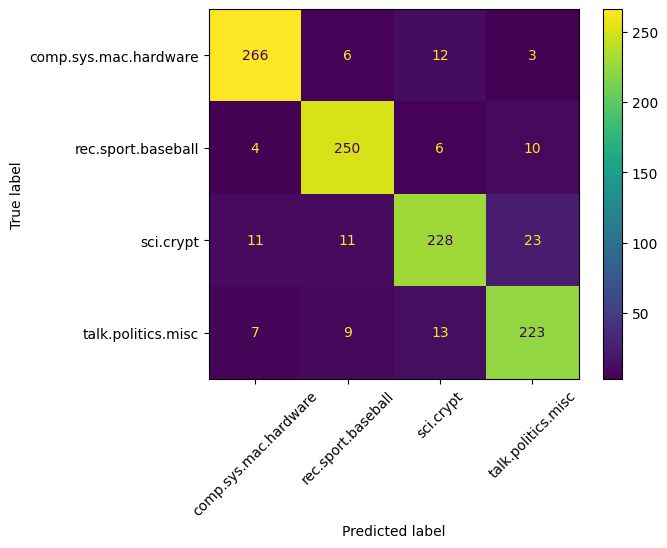

In [39]:
# Step 7: Evaluate the NEWS model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_news_test, y_news_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_news_test, y_news_pred, target_names=data.target_names))

cm = confusion_matrix(y_news_test, y_news_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(xticks_rotation=45)


# Part 3: Lab Tasks

## 3.1 Model Comparison for Spam Email Classification

### In this section, I evaluate all four machine learning models (Naive Bayes, SVM, Logistic Regression, Random Forest) using the same Bag-of-Words features and test set. I compare their accuracy and classification reports to determine which model performs best on the spam email task.

In [40]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    print("=" * 60)
    print(f"Model: {name}")
    print("=" * 60)

    # Predict on BoW test features
    y_pred = model.predict(X_test_vec)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    print("\n\n")

Model: Naive Bayes
Accuracy: 0.9784688995215312

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1453
        Spam       0.93      0.90      0.92       219

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672




Model: SVM
Accuracy: 0.9754784688995215

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99      1453
        Spam       0.98      0.83      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672




Model: Logistic Regression
Accuracy: 0.9754784688995215

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1453
        Spam   

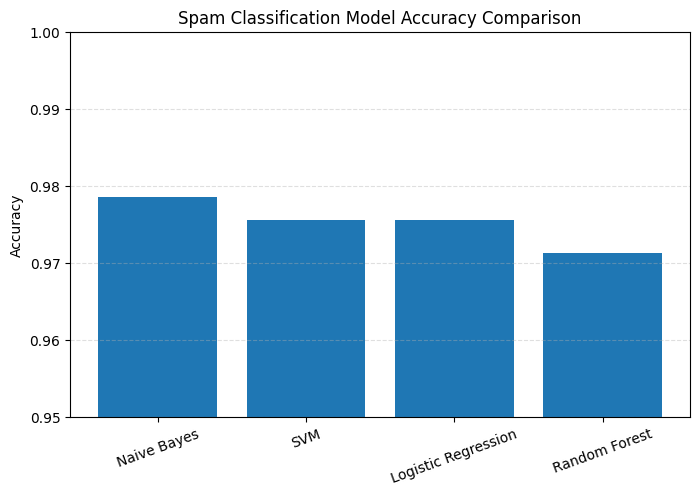

In [41]:
import matplotlib.pyplot as plt

# Accuracies from your model outputs
accuracies = {
    "Naive Bayes": 0.9784688995215312,
    "SVM": 0.9754784688995215,
    "Logistic Regression": 0.9754784688995215,
    "Random Forest": 0.9712918660287081
}

models = list(accuracies.keys())
scores = list(accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(models, scores)
plt.title("Spam Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### 3.1 Model Performance Summary (Spam Email Classification)

| Model                | Accuracy | Precision (Spam) | Recall (Spam) | F1-Score (Spam) |
|---------------------|----------|------------------|----------------|------------------|
| Naive Bayes         | 0.9785   | 0.93             | 0.90           | 0.92             |
| SVM                 | 0.9755   | 0.98             | 0.83           | 0.90             |
| Logistic Regression | 0.9755   | 0.99             | 0.82           | 0.90             |
| Random Forest       | 0.9713   | 0.99             | 0.79           | 0.88             |


### 3.2 (i) Suggested Improvement

#### To improve the accuracy of the news article classifier, I would use **bigrams (1–2 n-grams)** instead of only unigrams in the TF-IDF vectorizer. Bigrams help capture short phrases like “space mission”, “mac hardware”, or “political debate”, which give stronger topic signals than individual words alone.  I would also slightly increase `max_features` so more informative terms are included.


### 3.2 (ii) Improved TF-IDF with bigrams and higher feature limit

Improved model (SVM + bigrams) Accuracy: 0.9038817005545287

Classification Report (SVM + bigrams):
                       precision    recall  f1-score   support

comp.sys.mac.hardware       0.93      0.94      0.93       287
   rec.sport.baseball       0.92      0.94      0.93       270
            sci.crypt       0.90      0.83      0.86       273
   talk.politics.misc       0.87      0.90      0.88       252

             accuracy                           0.90      1082
            macro avg       0.90      0.90      0.90      1082
         weighted avg       0.90      0.90      0.90      1082



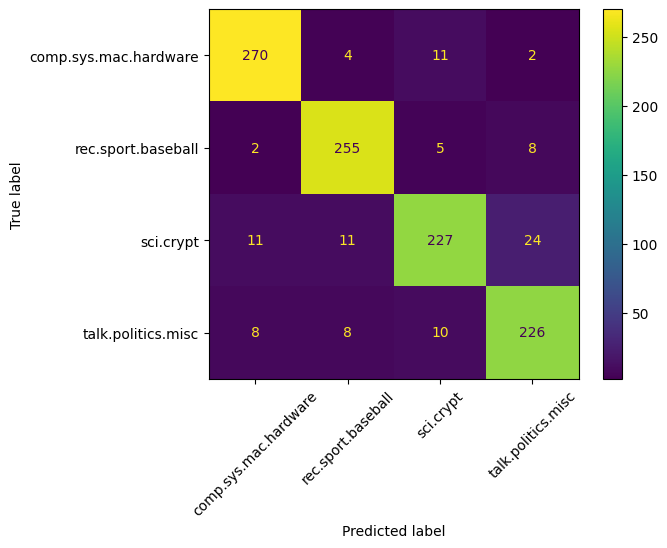

In [42]:
# 3.2 (ii) Improved TF-IDF with bigrams and higher feature limit

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Improved vectorizer: unigrams + bigrams, more features
news_vectorizer_bigram = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

X_news_train_tfidf_bigram = news_vectorizer_bigram.fit_transform(X_news_train)
X_news_test_tfidf_bigram = news_vectorizer_bigram.transform(X_news_test)

# Train SVM on improved features
news_model_bigram = LinearSVC()
news_model_bigram.fit(X_news_train_tfidf_bigram, y_news_train)

# Predictions
y_news_pred_bigram = news_model_bigram.predict(X_news_test_tfidf_bigram)

# Evaluation
print("Improved model (SVM + bigrams) Accuracy:",
      accuracy_score(y_news_test, y_news_pred_bigram))

print("\nClassification Report (SVM + bigrams):")
print(classification_report(y_news_test, y_news_pred_bigram, target_names=data.target_names))

cm_bigram = confusion_matrix(y_news_test, y_news_pred_bigram)
disp_bigram = ConfusionMatrixDisplay(confusion_matrix=cm_bigram, display_labels=data.target_names)
disp_bigram.plot(xticks_rotation=45)

### 3.2 (iii) Comparison Before and After Improvement

The baseline SVM model using unigram TF-IDF (max_features = 5000) achieved an accuracy of **0.8937**.  
After applying the enhancement — adding bigrams and increasing max_features to 10,000 — the accuracy improved to **0.9039**.

This improvement makes sense because bigrams allow the model to capture short phrases such as “space mission”, “mac hardware”, or “political issue”, which provide more context than individual words. Increasing the feature space also gives the classifier access to more informative terms.

Overall, the enhanced feature engineering resulted in:
- better separation of topics,
- higher overall accuracy,
- and improved precision/recall for several categories.

This confirms that adding n-grams is an effective way to boost performance in news topic classification.


### 3.2 (iv) + (v) – Using different ML technique & showing final metrics

Logistic Regression (bigrams) Accuracy: 0.9029574861367837

Classification Report (Logistic Regression + bigrams):
                       precision    recall  f1-score   support

comp.sys.mac.hardware       0.92      0.95      0.93       287
   rec.sport.baseball       0.91      0.94      0.93       270
            sci.crypt       0.90      0.85      0.87       273
   talk.politics.misc       0.88      0.87      0.88       252

             accuracy                           0.90      1082
            macro avg       0.90      0.90      0.90      1082
         weighted avg       0.90      0.90      0.90      1082



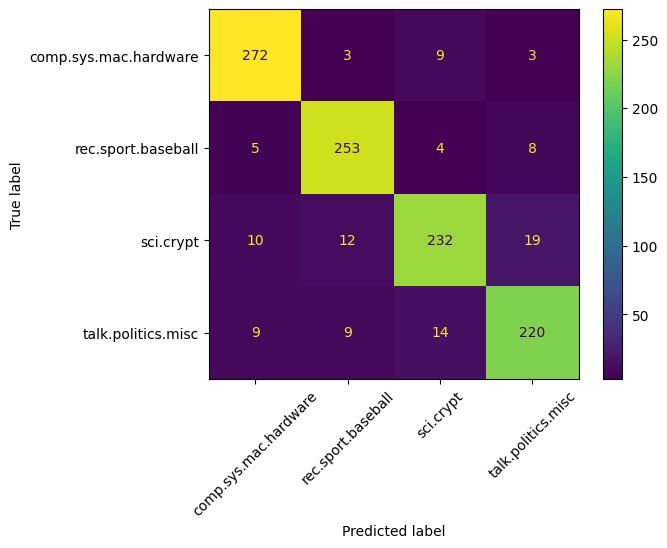

In [43]:
from sklearn.linear_model import LogisticRegression

# 3.2 (iv) Different ML technique: Logistic Regression on bigram TF-IDF

news_lr_model = LogisticRegression(max_iter=1000)
news_lr_model.fit(X_news_train_tfidf_bigram, y_news_train)

y_news_pred_lr = news_lr_model.predict(X_news_test_tfidf_bigram)

# 3.2 (v) Final accuracy and confusion matrix

print("Logistic Regression (bigrams) Accuracy:",
      accuracy_score(y_news_test, y_news_pred_lr))

print("\nClassification Report (Logistic Regression + bigrams):")
print(classification_report(y_news_test, y_news_pred_lr, target_names=data.target_names))

cm_lr = confusion_matrix(y_news_test, y_news_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=data.target_names)
disp_lr.plot(xticks_rotation=45)